In [1]:
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from keras.models import Sequential
from statistics import mean   
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
import time
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV


Using TensorFlow backend.


In [3]:
pi=math.pi
s = np.random.uniform(-2*pi,2*pi,120000)
df = pd.DataFrame(s)
df['x']=df[0]
df=df.drop([0], axis=1)
df['y']=df['x'].map(lambda x: ((((2*(math.cos(x)**2))-1))**2)*2)-1

X_dataframe = df['x']
y_dataframe = df['y']


X_train, X_test_holdout, y_train, y_test_holdout = train_test_split(X_dataframe, y_dataframe, test_size=0.5, random_state=42)
df.head(5)


,x,y
0,-5.923826,0.132965
1,3.315804,0.766870
2,3.070631,0.959985
3,-1.044778,-0.508358
4,-2.003834,-0.160654


In [6]:
def build_model(unit):
    model_shallow = Sequential() 
    model_shallow.add(Dense(units=unit, activation = 'relu', input_dim=1)) 
    model_shallow.add(Dense(units=1)) 
    model_shallow.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse'])
    
    model_medium = Sequential() 
    model_medium.add(Dense(units=round(unit/2), activation = 'relu', input_dim=1)) 
    model_medium.add(Dense(units=round(unit/2), activation = 'relu', input_dim=1))
    model_medium.add(Dense(units=1)) 
    model_medium.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse'])
    
    model_deep = Sequential() 
    model_deep.add(Dense(units=round(unit/3), activation = 'relu', input_dim=1)) 
    model_deep.add(Dense(units=round(unit/3), activation = 'relu', input_dim=1))
    model_deep.add(Dense(units=round(unit/3), activation = 'relu', input_dim=1))
    model_deep.add(Dense(units=1)) 
    model_deep.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse'])
         
    return model_shallow,model_medium,model_deep

In [16]:
error_shallow=[]
error_medium=[]
error_deep=[]
units=[]

In [ ]:

for unit in [20,40,60,80]:
    model_shallow,model_medium,model_deep=build_model(unit)      
    hist1=model_shallow.fit(X_train,y_train, epochs=35, batch_size=85)
    hist2=model_medium.fit(X_train,y_train, epochs=35, batch_size=85)
    hist3=model_deep.fit(X_train,y_train, epochs=35, batch_size=85)
    y_pred_shallow = model_shallow.predict(X_test_holdout)
    y_pred_medium = model_medium.predict(X_test_holdout)
    y_pred_deep = model_deep.predict(X_test_holdout)
    mse_shallow=metrics.mean_squared_error(y_test_holdout, y_pred_shallow)
    mse_medium=metrics.mean_squared_error(y_test_holdout, y_pred_medium)
    mse_deep=metrics.mean_squared_error(y_test_holdout, y_pred_deep)
    error_shallow.append(mse_shallow)
    error_medium.append(mse_medium)
    error_deep.append(mse_deep)
    units.append(unit)
    

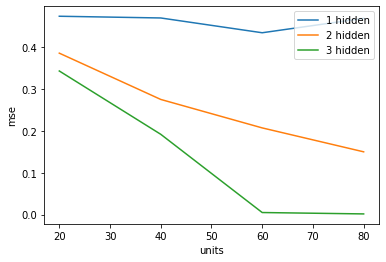

In [18]:
plt.plot(units,error_shallow,label='1 hidden')
plt.plot(units,error_medium,label='2 hidden')
plt.plot(units,error_deep,label='3 hidden')
plt.legend(loc='upper right')
plt.ylabel('mse')
plt.xlabel('units')
#plt.legend(['train', 'validation'], loc='upper left')
plt.show()


